<div align="center" style="border:solid orange 2px; padding: 5px"; class="alert alert-info">   
<span style="color:brown; font-size: 25px"> <b>Introduction for the project
<span align="center"style="color:brown; font-size: 15px"> <br>The task is to help optimize marketing expenses.<br>
<div align="left">
I have:<br>
Server logs with data on Yandex.Afisha visits from June 2017 through May 2018<br>
Dump file with all orders for the period<br>
Marketing expenses statistics<br><br>
I'm going to study:<br>
How people use the product<br>
When they start to buy<br>
How much money each customer brings<br>
When they pay off</b>

##  Download the data and prepare it for analysis

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# import sidetable
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import plotly
import os

from scipy import stats as st

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
try:
    visits=pd.read_csv('visits_log_us.csv',nrows=359400,dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts']) 
    orders= pd.read_csv('orders_log_us.csv',nrows=50415,parse_dates=['Buy Ts'])
    costs= pd.read_csv('costs_us.csv',nrows=2542,parse_dates=['dt'])
except:
    visits=pd.read_csv('/datasets/visits_log_us.csv',nrows=359400,dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts']) 
    orders= pd.read_csv('/datasets/orders_log_us.csv',nrows=50415,parse_dates=['Buy Ts'])
    costs= pd.read_csv('/datasets/costs_us.csv',nrows=2542,parse_dates=['dt'])

###  visits

In [4]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M")
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M")
visits['Device'] = visits['Device'].astype('category')
visits.shape
visits.head()
visits.info()
visits.describe(include='all')

(359400, 5)

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Device               End Ts  Source Id             Start Ts  \
count    359400               359400 359400.000               359400   
unique        2               224760        NaN               224303   
top     desktop  2017-11-24 16:51:00        NaN  2017-11-24 16:06:00   
freq     262567                   23        NaN                   19   
first       NaN  2017-06-01 00:02:00        NaN  2017-06-01 00:01:00   
last        NaN  2018-06-01 01:26:00        NaN  2018-05-31 23:59:00   
mean        NaN                  NaN      3.751                  NaN   
std         NaN                  NaN      1.917                  NaN   
min         NaN                  NaN      1.000                  NaN   
25%         NaN                  NaN      3.000                  NaN   
50%         NaN                  NaN      4.000                  NaN   
75%         NaN                  NaN      5.000                  NaN   
max         NaN                  NaN     10.000                  NaN   

                            Uid  
count                359400.000  
unique                      NaN  
top                         NaN  
freq                        NaN  
first                       NaN  
last                        NaN  
mean    9202556994354921472.000  
std     5298432824659611648.000  
min          11863502262781.000  
25%     4613406732167550976.000  
50%     9227412908740601856.000  
75%    13728237011236173824.000  
max    18446676030785673216.000

###  orders

In [5]:
orders['Uid'].nunique()

36523

In [6]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M")
orders.shape
orders.head()
orders.info()
orders.describe(include='all')

(50415, 3)

Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00   17.000  10329302124590727494
1 2017-06-01 00:25:00    0.550  11627257723692907447
2 2017-06-01 00:27:00    0.370  17903680561304213844
3 2017-06-01 00:29:00    0.550  16109239769442553005
4 2017-06-01 07:58:00    0.370  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Buy Ts   Revenue                      Uid
count                 50415 50415.000                50415.000
unique                45991       NaN                      NaN
top     2018-05-31 10:13:00       NaN                      NaN
freq                      9       NaN                      NaN
first   2017-06-01 00:10:00       NaN                      NaN
last    2018-06-01 00:02:00       NaN                      NaN
mean                    NaN     5.000  9098160634289729536.000
std                     NaN    21.818  5285741550834715648.000
min                     NaN     0.000      313578113262317.000
25%                     NaN     1.220  4533566627250599936.000
50%                     NaN     2.500  9102273602618561536.000
75%                     NaN     4.890 13682901980465401856.000
max                     NaN  2633.280 18446167067214817280.000

###  costs

In [7]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M")
costs.shape
costs.head()
costs.info()
costs.describe(include='all').T

(2542, 3)

source_id         dt  costs
0          1 2017-06-01 75.200
1          1 2017-06-02 62.250
2          1 2017-06-03 36.530
3          1 2017-06-04 55.000
4          1 2017-06-05 57.080

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


count unique        top freq      first       last    mean  \
source_id 2542.000    NaN        NaT  NaN        NaT        NaT   4.857   
dt            2542    364 2017-06-28    7 2017-06-01 2018-05-31     NaN   
costs     2542.000    NaN        NaT  NaN        NaT        NaT 129.477   

              std   min    25%    50%     75%      max  
source_id   3.182 1.000  2.000  4.000   9.000   10.000  
dt            NaN   NaN    NaN    NaN     NaN      NaN  
costs     156.297 0.540 21.945 77.295 170.065 1788.280

##  Make reports and calculate metrics:

###  Product

####  How many people use it :

In [8]:
visits['year']=visits['Start Ts'].astype('datetime64[Y]')
visits['month']=visits['Start Ts'].astype('datetime64[M]')
visits['Week']=visits['Start Ts'].astype('datetime64[W]')
visits['Day']=visits['Start Ts'].astype('datetime64[D]')

In [9]:
#it can be simple as just using groupby method and calculate unique users per day. 
dau=visits.groupby(visits['Day'])['Uid'].nunique().reset_index()
dau.head()

Day  Uid
0 2017-06-01  605
1 2017-06-02  608
2 2017-06-03  445
3 2017-06-04  476
4 2017-06-05  820

In [10]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(dau,x="Day", y="Uid",title='DAU')
#adding reference line with average DAU over time
fig.add_hline(y=dau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show()

In [11]:
wau=visits.groupby(visits['Week'])['Uid'].nunique().reset_index()
wau.head()

Week   Uid
0 2017-06-01  4082
1 2017-06-08  3311
2 2017-06-15  2844
3 2017-06-22  3079
4 2017-06-29  3055

In [12]:
import plotly.graph_objects as go
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="WAU")))
fig.add_trace(go.Scatter(x=wau['Week'], 
                        y=wau['Uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average WAU over time
fig.add_hline(y=wau['Uid'].mean(),line_dash="dash", line_color="red", annotation_text="average WAU",
             annotation_position="top left")
fig.show()

In [13]:
mau=visits.groupby(visits['month'])['Uid'].nunique().reset_index()
mau.head()

month    Uid
0 2017-06-01  13259
1 2017-07-01  14183
2 2017-08-01  11631
3 2017-09-01  18975
4 2017-10-01  29692

In [14]:
import plotly.graph_objects as go
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="MAU")))
fig.add_trace(go.Scatter(x=mau['month'], 
                        y=mau['Uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average MAU over time
fig.add_hline(y=mau['Uid'].mean(),line_dash="dash", line_color="red", annotation_text="average MAU",
             annotation_position="top left")
fig.show()

In [15]:
((visits['End Ts'].dt.day-visits['Start Ts'].dt.day)).sort_values(ascending=False)

87364      1
311541     1
38269      1
264159     1
185461     1
          ..
52774    -30
57863    -30
50461    -30
355366   -30
46667    -30
Length: 359400, dtype: int64

In [16]:
visits_desktop = visits[visits.Device == 'desktop']
visits_touch = visits[visits.Device == 'touch']

#####  every day?

In [17]:
DAU=visits.groupby(['Day','Device'])['Source Id'].nunique().reset_index() #every day
DAU.columns=['Day','Device','n_sources']
DAU

Day   Device  n_sources
0   2017-06-01  desktop          7
1   2017-06-01    touch          7
2   2017-06-02  desktop          7
3   2017-06-02    touch          7
4   2017-06-03  desktop          7
..         ...      ...        ...
723 2018-05-29    touch          7
724 2018-05-30  desktop          7
725 2018-05-30    touch          6
726 2018-05-31  desktop          8
727 2018-05-31    touch          7

[728 rows x 3 columns]

In [18]:
fig =px.scatter(DAU,x='Day',y='n_sources',color='Device',title='DAU');
fig 

#####  every week?

In [19]:
WAU = visits.groupby(['Week','Device'])['Source Id'].nunique().reset_index() #weekly
WAU.columns=['Week','Device','n_sources']
WAU

Week   Device  n_sources
0   2017-06-01  desktop          8
1   2017-06-01    touch          7
2   2017-06-08  desktop          7
3   2017-06-08    touch          7
4   2017-06-15  desktop          7
5   2017-06-15    touch          8
6   2017-06-22  desktop          7
7   2017-06-22    touch          7
8   2017-06-29  desktop          9
9   2017-06-29    touch          7
10  2017-07-06  desktop          7
11  2017-07-06    touch          7
12  2017-07-13  desktop          7
13  2017-07-13    touch          7
14  2017-07-20  desktop          7
15  2017-07-20    touch          7
16  2017-07-27  desktop          8
17  2017-07-27    touch          7
18  2017-08-03  desktop          7
19  2017-08-03    touch          7
20  2017-08-10  desktop          7
21  2017-08-10    touch          7
22  2017-08-17  desktop          8
23  2017-08-17    touch          7
24  2017-08-24  desktop          7
25  2017-08-24    touch          8
26  2017-08-31  desktop          8
27  2017-08-31    touch          7
28  2017-09-07  desktop          7
29  2017-09-07    touch          7
30  2017-09-14  desktop          7
31  2017-09-14    touch          7
32  2017-09-21  desktop          8
33  2017-09-21    touch          7
34  2017-09-28  desktop          8
35  2017-09-28    touch          8
36  2017-10-05  desktop          8
37  2017-10-05    touch          7
38  2017-10-12  desktop          8
39  2017-10-12    touch          8
40  2017-10-19  desktop          7
41  2017-10-19    touch          7
42  2017-10-26  desktop          8
43  2017-10-26    touch          7
44  2017-11-02  desktop          8
45  2017-11-02    touch          7
46  2017-11-09  desktop          8
47  2017-11-09    touch          7
48  2017-11-16  desktop          7
49  2017-11-16    touch          7
50  2017-11-23  desktop          7
51  2017-11-23    touch          7
52  2017-11-30  desktop          8
53  2017-11-30    touch          8
54  2017-12-07  desktop          8
55  2017-12-07    touch          7
56  2017-12-14  desktop          7
57  2017-12-14    touch          7
58  2017-12-21  desktop          8
59  2017-12-21    touch          7
60  2017-12-28  desktop          8
61  2017-12-28    touch          7
62  2018-01-04  desktop          8
63  2018-01-04    touch          8
64  2018-01-11  desktop          8
65  2018-01-11    touch          7
66  2018-01-18  desktop          8
67  2018-01-18    touch          7
68  2018-01-25  desktop          8
69  2018-01-25    touch          7
70  2018-02-01  desktop          8
71  2018-02-01    touch          7
72  2018-02-08  desktop          8
73  2018-02-08    touch          8
74  2018-02-15  desktop          8
75  2018-02-15    touch          7
76  2018-02-22  desktop          8
77  2018-02-22    touch          7
78  2018-03-01  desktop          7
79  2018-03-01    touch          7
80  2018-03-08  desktop          7
81  2018-03-08    touch          7
82  2018-03-15  desktop          8
83  2018-03-15    touch          7
84  2018-03-22  desktop          7
85  2018-03-22    touch          7
86  2018-03-29  desktop          7
87  2018-03-29    touch          7
88  2018-04-05  desktop          7
89  2018-04-05    touch          7
90  2018-04-12  desktop          7
91  2018-04-12    touch          8
92  2018-04-19  desktop          7
93  2018-04-19    touch          7
94  2018-04-26  desktop          7
95  2018-04-26    touch          7
96  2018-05-03  desktop          7
97  2018-05-03    touch          8
98  2018-05-10  desktop          7
99  2018-05-10    touch          7
100 2018-05-17  desktop          7
101 2018-05-17    touch          7
102 2018-05-24  desktop          7
103 2018-05-24    touch          7
104 2018-05-31  desktop          8
105 2018-05-31    touch          7

In [20]:
fig =px.scatter(WAU,x='Week',y='n_sources',color='Device',title='WAU');
fig 

#####  every month?

In [21]:
MAU = visits.groupby(['month','Device'])['Source Id'].nunique().reset_index() #monthly
MAU.columns=['month','Device','n_sources']
MAU.month=MAU.month.dt.month
MAU

month   Device  n_sources
0       6  desktop          8
1       6    touch          8
2       7  desktop          9
3       7    touch          7
4       8  desktop          8
5       8    touch          8
6       9  desktop          9
7       9    touch          7
8      10  desktop          8
9      10    touch          8
10     11  desktop          9
11     11    touch          7
12     12  desktop          9
13     12    touch          8
14      1  desktop          9
15      1    touch          8
16      2  desktop          8
17      2    touch          8
18      3  desktop          8
19      3    touch          7
20      4  desktop          7
21      4    touch          8
22      5  desktop          8
23      5    touch          8

In [22]:
fig =px.scatter(MAU,x='month',y='n_sources',color='Device',title='MAU');
fig 

####  How many sessions are there per day? (One user might have more than one session.)

In [23]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid', 'year', 'month',
       'Week', 'Day'],
      dtype='object')

In [24]:
dau_new=visits.groupby(visits['Day'])['Source Id','Uid'].nunique().reset_index()
dau_new['sessions_per_user']=dau_new['Source Id']/dau_new['Uid']
dau_new.head()

Day  Source Id  Uid  sessions_per_user
0 2017-06-01          7  605              0.012
1 2017-06-02          7  608              0.012
2 2017-06-03          7  445              0.016
3 2017-06-04          7  476              0.015
4 2017-06-05          7  820              0.009

In [25]:
fig = px.line(dau_new,x="Day", y="sessions_per_user",title='Sessions per user')
fig.show()

In [26]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=dau_new['Day'], 
                         y=dau_new['Uid'],
                         mode='lines',
                         name='DAU',line = dict(color='yellow', width=2 )))

fig.add_trace(go.Scatter(x=dau_new['Day'], 
                         y=dau_new['Source Id'], 
                         mode='lines',
                         name='sessions',line = dict(color='black', width=2 )))
fig.update_layout(
    showlegend=True,
    plot_bgcolor="grey",
    margin=dict(t=10,l=10,b=10,r=10))
fig.show()

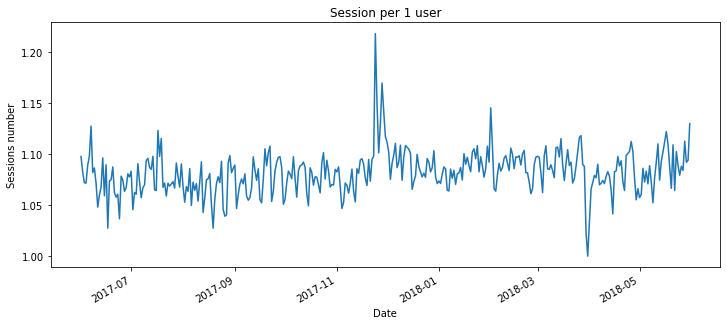

In [27]:
sess_per_user = visits.groupby('Day').agg({'Uid': ['count','nunique']})
sess_per_user.columns = ['n_sessions', 'n_users']
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']
plt.figure(figsize= (12,5))
sess_per_user['sess_per_user'].plot().set(title = 'Session per 1 user', xlabel = 'Date', ylabel = 'Sessions number');

####  What is the length of each session?

<div align="center" style="border:solid orange 2px; padding: 5px"; class="alert alert-info">   
<span style="color:brown; font-size: 20px"> <b>for both devices

In [28]:
dau_total = visits.groupby(['year','Day']).agg({'Source Id': 'nunique'}).mean()
wau_total = visits.groupby(['year', 'Week']).agg({'Source Id': 'nunique'}).mean()
mau_total = visits.groupby(['year', 'month']).agg({'Source Id': 'nunique'}).mean()
print('daily',int(dau_total))
print('weekly',int(wau_total)) 
print('monthly',int(mau_total)) 

daily 7
weekly 7
monthly 8


In [29]:
sessions_per_user = visits.groupby(['year', 'month']).agg({'Source Id': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
print('Average session length in seconds, or ASL',visits['session_duration_sec'].mean()) 

Average session length in seconds, or ASL 643.506488592098


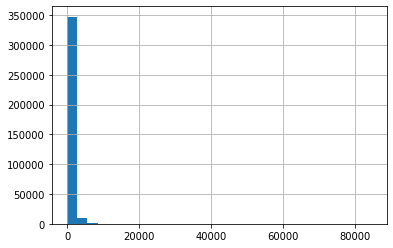

In [30]:
visits['session_duration_sec'].hist(bins=30);

In [31]:
# in our case it's impossible to take the mean so we take the median
print('median session length in seconds, or ASL')
print(visits['session_duration_sec'].mode()) 

median session length in seconds, or ASL
0    60
dtype: int64


<div align="center" style="border:solid orange 2px; padding: 5px"; class="alert alert-info">   
<span style="color:brown; font-size: 20px"> <b>desktop device

In [32]:
dau_total_D = visits_desktop.groupby('Day').agg({'Source Id': 'nunique'}).mean()
wau_total_D = visits_desktop.groupby(['year', 'Week']).agg({'Source Id': 'nunique'}).mean()
mau_total_D = visits_desktop.groupby(['year', 'month']).agg({'Source Id': 'nunique'}).mean()
print('daily',int(dau_total_D))
print('weekly',int(wau_total_D)) 
print('monthly',int(mau_total_D)) 

daily 7
weekly 7
monthly 8


In [33]:
sessions_per_user_D = visits_desktop.groupby(['year', 'month']).agg({'Source Id': ['count', 'nunique']})
sessions_per_user_D.columns = ['n_sessions', 'n_users']
sessions_per_user_D['sessions_per_user_D'] = (sessions_per_user_D['n_sessions'] / sessions_per_user_D['n_users'])
visits_desktop['session_duration_sec'] = (visits_desktop['End Ts'] - visits_desktop['Start Ts']).dt.seconds
print('Average session length in seconds, or ASL',visits_desktop['session_duration_sec'].mean()) 

Average session length in seconds, or ASL 703.9469773429258


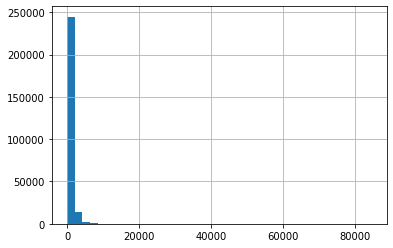

In [34]:
# The average session length in desktop is longer as it is in touch Device,
# that indicates that the desktop is better so it's mean users enjoy using it.
visits_desktop['session_duration_sec'].hist(bins=40);

In [35]:
# in our case it's impossible to take the mean so we take the median
print('median session length in seconds, or ASL')
print(visits_desktop['session_duration_sec'].mode()) 

median session length in seconds, or ASL
0    60
dtype: int64


<div align="center" style="border:solid orange 2px; padding: 5px"; class="alert alert-info">   
<span style="color:brown; font-size: 20px"> <b>touch device

In [36]:
dau_total_T = visits_touch.groupby('Day').agg({'Source Id': 'nunique'}).mean()
wau_total_T = visits_touch.groupby(['year', 'Week']).agg({'Source Id': 'nunique'}).mean()
mau_total_T = visits_touch.groupby(['year', 'month']).agg({'Source Id': 'nunique'}).mean()
print('daily',int(dau_total_T))
print('weekly',int(wau_total_T)) 
print('monthly',int(mau_total_T)) 

daily 6
weekly 7
monthly 7


In [37]:
sessions_per_user_T = visits_touch.groupby(['year', 'month']).agg({'Source Id': ['count', 'nunique']})
sessions_per_user_T.columns = ['n_sessions', 'n_users']
sessions_per_user_T['sessions_per_user_T'] = (sessions_per_user_T['n_sessions'] / sessions_per_user_T['n_users'])
visits_touch['session_duration_sec'] = (visits_touch['End Ts'] - visits_touch['Start Ts']).dt.seconds
print('Average session length in seconds, or ASL',visits_touch['session_duration_sec'].mean()) 

Average session length in seconds, or ASL 479.6194066072517


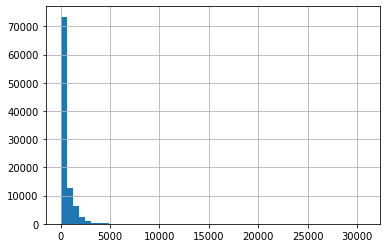

In [38]:
visits_touch['session_duration_sec'].hist(bins=50);

In [39]:
# in our case it's impossible to take the mean so we take the median
print('median session length in seconds, or ASL')
print(visits_touch['session_duration_sec'].mode()) 

median session length in seconds, or ASL
0    60
dtype: int64


***\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\***

In [40]:
first_activity_date=visits.groupby(['Uid'])['Day'].min()
first_activity_date.name = 'first_visit_date'
visits=visits.join(first_activity_date,on='Uid') 
visits['first_visit_month']=visits['first_visit_date'].astype('datetime64[M]')

In [41]:
visits['month_diff'] = (visits['End Ts'].dt.month - visits['first_visit_month'].dt.month)
visits['month_diff'][visits['month_diff']<0]=0
visits_desktop['month_diff']=visits['month_diff'][visits['Device']=='desktop']
visits_touch['month_diff']=visits['month_diff'][visits['Device']=='touch']

In [42]:
round(visits['month_diff'].mean(),2)
print('months')

0.35

months


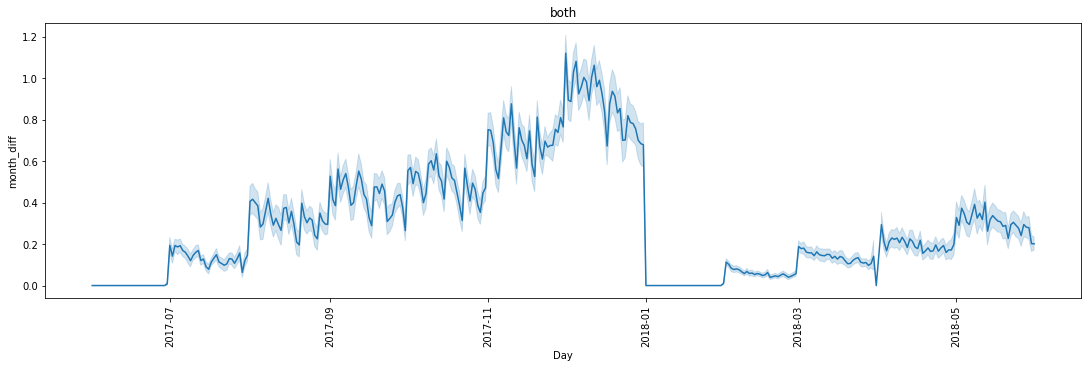

In [43]:
f, axes = plt.subplots(figsize=(15,5),constrained_layout=True)
plt.xticks(rotation = 'vertical')
sns.lineplot(data=visits, x="Day", y="month_diff").set(title='both');

In [44]:
round(visits_desktop.month_diff.mean(),2)
print('months')
round(visits_touch.month_diff.mean(),2)
print('months')

0.38

months


0.24

months


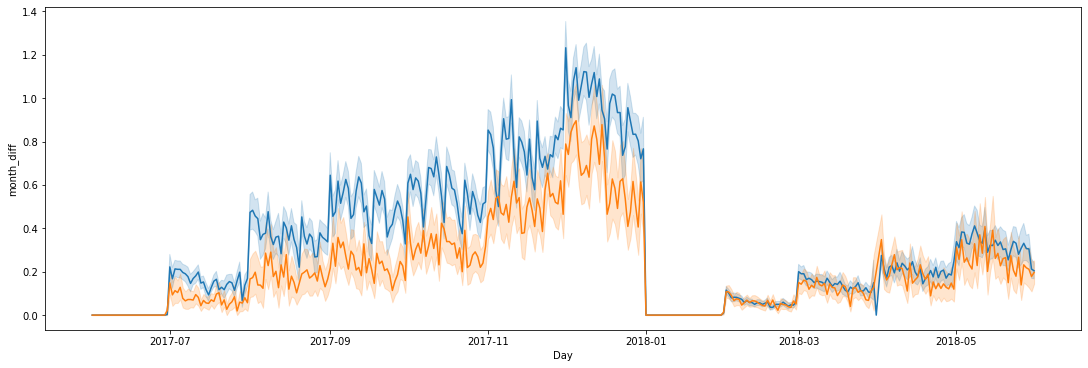

In [45]:
f, axes = plt.subplots(figsize=(15,5),constrained_layout=True)
sns.lineplot(data=visits_desktop, x="Day", y="month_diff");
sns.lineplot(data=visits_touch, x="Day", y="month_diff");

***\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\***

####  How often do users come back?

In [46]:
visits['cohort_lifetime'] = (visits['month'] - visits['first_visit_month'])
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = round(visits['cohort_lifetime']).astype('int')

In [47]:
def visits_pivot(df, index = 'first_visit_month', columns = 'month'):
    """
    The function takes a dataframe, an index ('first_visit_month' by default)
    and a column to pivot on ('visit_month' by default) and returns corresponding pivot table.
    """
    return df.pivot_table(
    index=index,
    columns=columns,
    values='Uid',
    aggfunc='nunique',
    )

In [48]:
cohorts_lft = visits_pivot(visits, columns = 'cohort_lifetime')

In [49]:
initial_users_count = cohorts_lft[0]
initial_users_count.name = 'cohort_users'

In [50]:
coh_lft = pd.DataFrame()
for col in list(range(0,12)):
    coh_lft[col] = cohorts_lft[col] / initial_users_count

In [51]:
coh_lft=coh_lft.astype('float')
#coh_lft=coh_lft.fillna('0')

In [52]:
coh_lft

0     1     2     3     4     5     6     7     8     9   \
first_visit_month                                                               
2017-06-01        1.000 0.079 0.054 0.061 0.069 0.071 0.061 0.058 0.052 0.051   
2017-07-01        1.000 0.056 0.051 0.056 0.058 0.048 0.045 0.046 0.039 0.029   
2017-08-01        1.000 0.077 0.063 0.063 0.050 0.044 0.036 0.039 0.028 0.026   
2017-09-01        1.000 0.085 0.069 0.051 0.039 0.038 0.036 0.024 0.023   NaN   
2017-10-01        1.000 0.079 0.052 0.039 0.034 0.032 0.021 0.020   NaN   NaN   
2017-11-01        1.000 0.078 0.044 0.039 0.034 0.023 0.022   NaN   NaN   NaN   
2017-12-01        1.000 0.056 0.038 0.031 0.020 0.019   NaN   NaN   NaN   NaN   
2018-01-01        1.000 0.060 0.039 0.025 0.020   NaN   NaN   NaN   NaN   NaN   
2018-02-01        1.000 0.057 0.025 0.020   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01        1.000 0.042 0.027   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01        1.000 0.048   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01        1.000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                     10    11  
first_visit_month              
2017-06-01        0.041 0.045  
2017-07-01        0.027   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

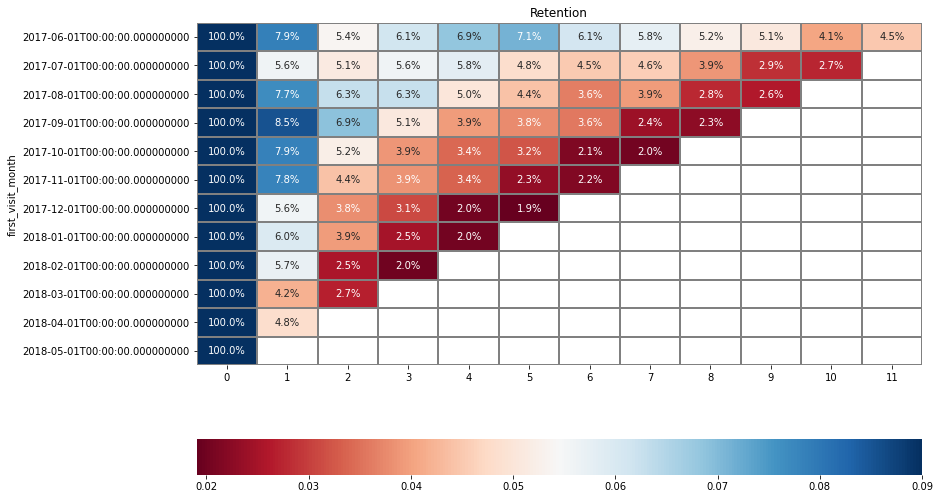

In [53]:
plt.figure(figsize=(13, 9))
plt.title('Retention')
sns.heatmap(
    coh_lft,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='grey',  vmax=0.09,cmap="RdBu", cbar_kws= {'orientation': 'horizontal'});

###  Sales

####  When do people start buying? 

In [54]:
orders['Buy Ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy Ts, dtype: object

In [55]:
orders['year']=orders['Buy Ts'].astype('datetime64[Y]')
orders['month']=orders['Buy Ts'].astype('datetime64[M]')
orders['Week']=orders['Buy Ts'].astype('datetime64[W]')
orders['Day']=orders['Buy Ts'].astype('datetime64[D]')

In [56]:
first_activity_date=orders.groupby(['Uid'])['Day'].min()
first_activity_date.name = 'first_order_date'
orders=orders.join(first_activity_date,on='Uid') 
orders['first_order_month']=orders['first_order_date'].astype('datetime64[M]')

In [57]:
orders['cohort_lifetime'] = (orders['month'] - orders['first_order_month'])
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'D')
orders['cohort_lifetime'] = round(orders['cohort_lifetime']).astype('int')

In [58]:
orders['month_diff'] = (orders['Buy Ts'].dt.month - orders['first_order_month'].dt.month)
orders['month_diff'][orders['month_diff']<0]=0

In [59]:
px.histogram(orders, x="cohort_lifetime",nbins=30)

In [60]:
orders['cohort_lifetime'].median()

0.0

So, on average it takes 0 days to convert for a user. But how many users converted at all?

In [61]:
print('The overall conversion is {:.1%}'.format(orders['Uid'].nunique()/visits['Uid'].nunique()))

The overall conversion is 16.0%


####  How many orders do they make during a given period of time?

In [62]:
#let's define cohort size. this is one of the most important aggregation that we will use in cohort analysis
#using the month of first purchase we will define which cohort our buyers belongs to
cohort_sizes = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
cohort_sizes.head()

first_order_month  cohort_size
0        2017-06-01         2023
1        2017-07-01         1923
2        2017-08-01         1370
3        2017-09-01         2581
4        2017-10-01         4340

In [63]:
#calculating number of purchases for cohort and month
cohort=orders.groupby(['first_order_month','month'])['Revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
#merge cohort with cohort size
cohort=cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age_month'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']
cohort.head()

first_order_month      month  orders  cohort_size  age_month  \
0        2017-06-01 2017-06-01    2354         2023      0.000   
1        2017-06-01 2017-07-01     177         2023      1.000   
2        2017-06-01 2017-08-01     174         2023      2.000   
3        2017-06-01 2017-09-01     226         2023      3.000   
4        2017-06-01 2017-10-01     292         2023      4.000   

   orders_per_buyer  
0             1.164  
1             0.087  
2             0.086  
3             0.112  
4             0.144

In [64]:
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna('')

age_month          0.000  1.000  2.000  3.000  4.000  5.000  6.000  7.000   \
first_order_month                                                            
2017-06-01          1.160  1.250  1.340  1.450  1.590  1.700  1.840  1.920   
2017-07-01          1.140  1.190  1.250  1.310  1.340  1.390  1.420  1.440   
2017-08-01          1.120  1.200  1.270  1.330  1.390  1.440  1.470  1.530   
2017-09-01          1.140  1.220  1.280  1.350  1.370  1.420  1.460  1.480   
2017-10-01          1.140  1.220  1.250  1.280  1.310  1.340  1.350  1.380   
2017-11-01          1.180  1.280  1.320  1.370  1.410  1.420  1.450          
2017-12-01          1.150  1.210  1.260  1.300  1.320  1.340                 
2018-01-01          1.120  1.190  1.240  1.250  1.280                        
2018-02-01          1.120  1.180  1.210  1.220                               
2018-03-01          1.170  1.220  1.270                                      
2018-04-01          1.100  1.180                                             
2018-05-01          1.090                                                    
2018-06-01          1.000                                                    

age_month         8.000  9.000  10.000 11.000  
first_order_month                              
2017-06-01         2.030  2.100  2.150  2.190  
2017-07-01         1.470  1.490  1.510         
2017-08-01         1.560  1.600                
2017-09-01         1.500                       
2017-10-01                                     
2017-11-01                                     
2017-12-01                                     
2018-01-01                                     
2018-02-01                                     
2018-03-01                                     
2018-04-01                                     
2018-05-01                                     
2018-06-01

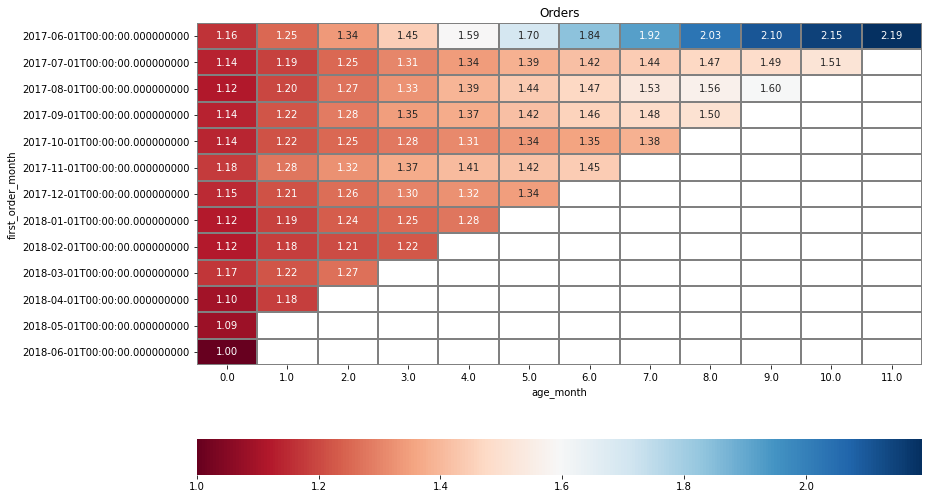

In [65]:
plt.figure(figsize=(13, 9))
plt.title('Orders')
sns.heatmap(
    cohort_piv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='grey',vmin=1,vmax=2.19,cmap="RdBu", cbar_kws= {'orientation': 'horizontal'});

####  What is the average purchase size?

In [66]:
av_user=orders.groupby(['month'])['Revenue'].mean().reset_index()
av_user

month  Revenue
0  2017-06-01    4.060
1  2017-07-01    5.307
2  2017-08-01    4.847
3  2017-09-01    5.416
4  2017-10-01    4.928
5  2017-11-01    4.784
6  2017-12-01    5.852
7  2018-01-01    4.113
8  2018-02-01    4.840
9  2018-03-01    5.414
10 2018-04-01    5.151
11 2018-05-01    4.771
12 2018-06-01    3.420

In [67]:
fig =px.line(av_user,x='month',y='Revenue',title='average purchase');
fig 

####  How much money do they bring? (LTV)

In [68]:
#get the revenue per cohort in each month
ltv_cohort=orders.groupby(['first_order_month','month'])['Revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']
#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort

first_order_month      month   revenue  cohort_size    age   ltv
0         2017-06-01 2017-06-01  9557.490         2023  0.000 4.724
1         2017-06-01 2017-07-01   981.820         2023  1.000 0.485
2         2017-06-01 2017-08-01   885.340         2023  2.000 0.438
3         2017-06-01 2017-09-01  1931.300         2023  3.000 0.955
4         2017-06-01 2017-10-01  2068.580         2023  4.000 1.023
5         2017-06-01 2017-11-01  1487.920         2023  5.000 0.736
6         2017-06-01 2017-12-01  1922.740         2023  6.000 0.950
7         2017-06-01 2018-01-01  1176.560         2023  7.000 0.582
8         2017-06-01 2018-02-01  1119.150         2023  8.000 0.553
9         2017-06-01 2018-03-01  1225.510         2023  9.000 0.606
10        2017-06-01 2018-04-01  1155.660         2023 10.000 0.571
11        2017-06-01 2018-05-01   519.620         2023 11.000 0.257
12        2017-07-01 2017-07-01 11557.650         1923  0.000 6.010
13        2017-07-01 2017-08-01   644.610         1923  1.000 0.335
14        2017-07-01 2017-09-01  1199.050         1923  2.000 0.624
15        2017-07-01 2017-10-01   690.310         1923  3.000 0.359
16        2017-07-01 2017-11-01   339.970         1923  4.000 0.177
17        2017-07-01 2017-12-01   300.080         1923  5.000 0.156
18        2017-07-01 2018-01-01   231.160         1923  6.000 0.120
19        2017-07-01 2018-02-01   272.720         1923  7.000 0.142
20        2017-07-01 2018-03-01   310.050         1923  8.000 0.161
21        2017-07-01 2018-04-01   282.960         1923  9.000 0.147
22        2017-07-01 2018-05-01   299.360         1923 10.000 0.156
23        2017-08-01 2017-08-01  7228.830         1370  0.000 5.277
24        2017-08-01 2017-09-01   646.630         1370  1.000 0.472
25        2017-08-01 2017-10-01   628.120         1370  2.000 0.458
26        2017-08-01 2017-11-01   536.050         1370  3.000 0.391
27        2017-08-01 2017-12-01   676.850         1370  4.000 0.494
28        2017-08-01 2018-01-01   388.450         1370  5.000 0.284
29        2017-08-01 2018-02-01   288.610         1370  6.000 0.211
30        2017-08-01 2018-03-01   554.860         1370  7.000 0.405
31        2017-08-01 2018-04-01   400.330         1370  8.000 0.292
32        2017-08-01 2018-05-01   257.530         1370  9.000 0.188
33        2017-09-01 2017-09-01 14568.530         2581  0.000 5.645
34        2017-09-01 2017-10-01  2884.490         2581  1.000 1.118
35        2017-09-01 2017-11-01  1344.520         2581  2.000 0.521
36        2017-09-01 2017-12-01 10261.520         2581  3.000 3.976
37        2017-09-01 2018-01-01  1033.840         2581  4.000 0.401
38        2017-09-01 2018-02-01  1670.080         2581  5.000 0.647
39        2017-09-01 2018-03-01  1810.850         2581  6.000 0.702
40        2017-09-01 2018-04-01   627.570         2581  7.000 0.243
41        2017-09-01 2018-05-01   474.920         2581  8.000 0.184
42        2017-10-01 2017-10-01 21716.200         4340  0.000 5.004
43        2017-10-01 2017-11-01  2325.210         4340  1.000 0.536
44        2017-10-01 2017-12-01   830.650         4340  2.000 0.191
45        2017-10-01 2018-01-01   682.010         4340  3.000 0.157
46        2017-10-01 2018-02-01   657.770         4340  4.000 0.152
47        2017-10-01 2018-03-01   522.370         4340  5.000 0.120
48        2017-10-01 2018-04-01   368.100         4340  6.000 0.085
49        2017-10-01 2018-05-01   501.140         4340  7.000 0.115
50        2017-11-01 2017-11-01 21036.260         4081  0.000 5.155
51        2017-11-01 2017-12-01  1629.270         4081  1.000 0.399
52        2017-11-01 2018-01-01   814.390         4081  2.000 0.200
53        2017-11-01 2018-02-01  1326.130         4081  3.000 0.325
54        2017-11-01 2018-03-01   604.040         4081  4.000 0.148
55        2017-11-01 2018-04-01   219.880         4081  5.000 0.054
56        2017-11-01 2018-05-01   469.020         4081  6.000 0.115
57        2017-12-01 2017-12-01 20767.490         4383  0.0

In [69]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

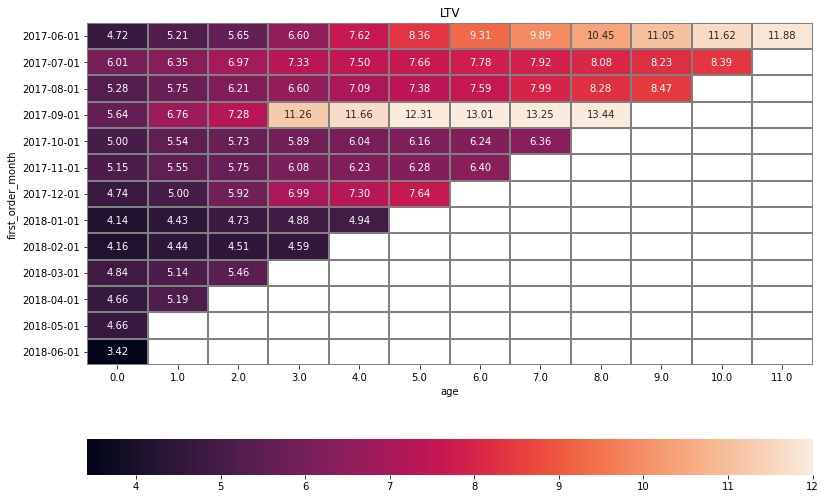

In [70]:
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(ltv_cohort_piv,
            annot=True, fmt='.2f',
            linewidths=1, linecolor='grey',
            cbar_kws= {'orientation': 'horizontal'},
            vmax=12).set(title ='LTV');

### Marketing

####  How much money was spent? Overall/per source/over time

In [71]:
costs.head()

source_id         dt  costs
0          1 2017-06-01 75.200
1          1 2017-06-02 62.250
2          1 2017-06-03 36.530
3          1 2017-06-04 55.000
4          1 2017-06-05 57.080

In [72]:
#sorting cost for futher visualization
costs=costs.sort_values(by=['dt','source_id'])
costs.head()

source_id         dt   costs
0             1 2017-06-01  75.200
363           2 2017-06-01 132.560
726           3 2017-06-01 349.380
1089          4 2017-06-01  76.740
1452          5 2017-06-01  73.240

In [73]:
print('Total marketing cost is {}'.format(costs['costs'].sum()))

Total marketing cost is 329131.62


In [74]:
costs_per_source=costs.groupby(['source_id'])['costs'].sum().reset_index()
costs_per_source

source_id      costs
0          1  20833.270
1          2  42806.040
2          3 141321.630
3          4  61073.600
4          5  51757.100
5          9   5517.490
6         10   5822.490

In [75]:
fig = px.line(costs, x="dt", y="costs", color='source_id')
fig

In [76]:
costs['year']=costs['dt'].astype('datetime64[Y]')
costs['cost_month']=costs['dt'].astype('datetime64[M]')
costs['Week']=costs['dt'].astype('datetime64[W]')
costs['Day']=costs['dt'].astype('datetime64[D]')

In [77]:
monthly_costs = costs.groupby('cost_month').sum()
print('Overall spent:',costs['costs'].sum())
print
print('Per source spent:')
spent_source=costs.groupby('source_id').sum().reset_index()
spent_source
print
print('Over time spent:')
monthly_costs=monthly_costs.reset_index()
monthly_costs.head()

Overall spent: 329131.62


<function print>

Per source spent:


source_id      costs
0          1  20833.270
1          2  42806.040
2          3 141321.630
3          4  61073.600
4          5  51757.100
5          9   5517.490
6         10   5822.490

<function print>

Over time spent:


cost_month  source_id     costs
0 2017-06-01       1020 18015.000
1 2017-07-01       1054 18240.590
2 2017-08-01       1054 14790.540
3 2017-09-01       1020 24368.910
4 2017-10-01       1054 36322.880

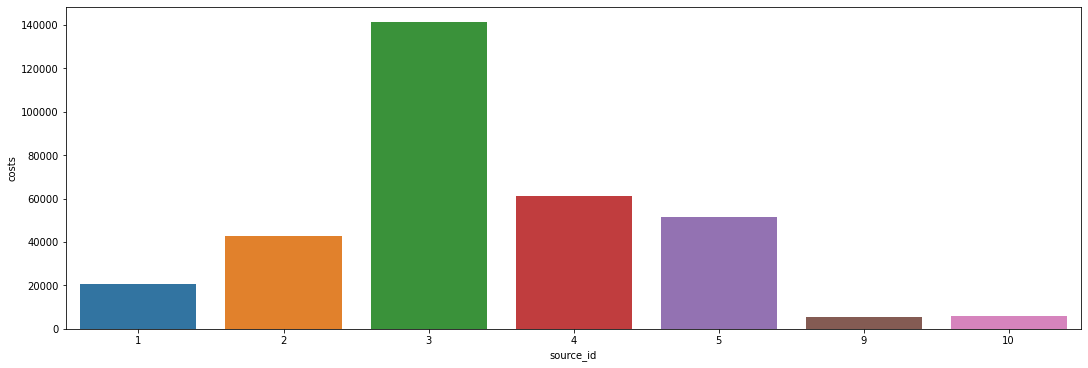

In [78]:
f, axes = plt.subplots(figsize=(15,5),constrained_layout=True)
sns.barplot(data=spent_source, x="source_id", y="costs");

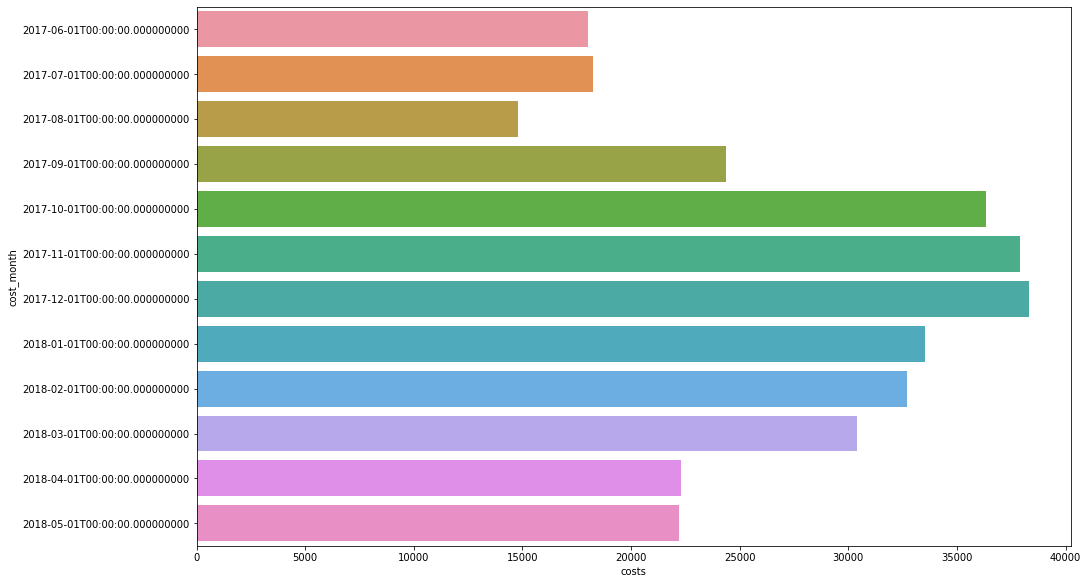

In [79]:
f, axes = plt.subplots(figsize=(15,8),constrained_layout=True)
#plt.xticks(rotation = 'vertical')
sns.barplot(data=monthly_costs, x="costs", y="cost_month");

####  How much did customer acquisition from each of the sources cost?

In [80]:
costs

source_id         dt   costs       year cost_month       Week        Day
0             1 2017-06-01  75.200 2017-01-01 2017-06-01 2017-06-01 2017-06-01
363           2 2017-06-01 132.560 2017-01-01 2017-06-01 2017-06-01 2017-06-01
726           3 2017-06-01 349.380 2017-01-01 2017-06-01 2017-06-01 2017-06-01
1089          4 2017-06-01  76.740 2017-01-01 2017-06-01 2017-06-01 2017-06-01
1452          5 2017-06-01  73.240 2017-01-01 2017-06-01 2017-06-01 2017-06-01
...         ...        ...     ...        ...        ...        ...        ...
1088          3 2018-05-31 822.300 2018-01-01 2018-05-01 2018-05-31 2018-05-31
1451          4 2018-05-31 492.540 2018-01-01 2018-05-01 2018-05-31 2018-05-31
1815          5 2018-05-31 398.040 2018-01-01 2018-05-01 2018-05-31 2018-05-31
2178          9 2018-05-31  27.370 2018-01-01 2018-05-01 2018-05-31 2018-05-31
2541         10 2018-05-31  17.600 2018-01-01 2018-05-01 2018-05-31 2018-05-31

[2542 rows x 7 columns]

In [81]:
costs_by_month=costs.groupby(['cost_month'])['costs'].sum().reset_index()
costs_by_month.head()

cost_month     costs
0 2017-06-01 18015.000
1 2017-07-01 18240.590
2 2017-08-01 14790.540
3 2017-09-01 24368.910
4 2017-10-01 36322.880

In [82]:
buyers_per_moth=orders.groupby(['first_order_month'])['Uid'].nunique().reset_index()
buyers_per_moth.columns=['cost_month','buyers']
buyers_per_moth.head()

cost_month  buyers
0 2017-06-01    2023
1 2017-07-01    1923
2 2017-08-01    1370
3 2017-09-01    2581
4 2017-10-01    4340

In [83]:
CAC_per_month=costs_by_month.merge(buyers_per_moth,how='left',on=['cost_month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

cost_month     costs  buyers    CAC
0 2017-06-01 18015.000    2023  8.905
1 2017-07-01 18240.590    1923  9.485
2 2017-08-01 14790.540    1370 10.796
3 2017-09-01 24368.910    2581  9.442
4 2017-10-01 36322.880    4340  8.369

In [84]:
fig = px.line(CAC_per_month, x="cost_month", y="CAC", title='CAC')
fig.show()

In [85]:
orders.head()

Buy Ts  Revenue                   Uid       year      month  \
0 2017-06-01 00:10:00   17.000  10329302124590727494 2017-01-01 2017-06-01   
1 2017-06-01 00:25:00    0.550  11627257723692907447 2017-01-01 2017-06-01   
2 2017-06-01 00:27:00    0.370  17903680561304213844 2017-01-01 2017-06-01   
3 2017-06-01 00:29:00    0.550  16109239769442553005 2017-01-01 2017-06-01   
4 2017-06-01 07:58:00    0.370  14200605875248379450 2017-01-01 2017-06-01   

        Week        Day first_order_date first_order_month  cohort_lifetime  \
0 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
1 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
2 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
3 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
4 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   

   month_diff  
0           0  
1           0  
2           0  
3           0  
4           0

In [86]:
visits.head(1)

Device              End Ts  Source Id            Start Ts  \
0  touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   

                    Uid       year      month       Week        Day  \
0  16879256277535980062 2017-01-01 2017-12-01 2017-12-14 2017-12-20   

   session_duration_sec first_visit_date first_visit_month  month_diff  \
0                  1080       2017-12-20        2017-12-01           0   

   cohort_lifetime  
0                0

In [87]:
# CAC per source
visits.groupby(['Uid'])['Source Id'].nunique().head()

Uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: Source Id, dtype: int64

In [88]:
# Not all users have one source, let's define the first that they came from as the main source.
first_source=visits.sort_values('Day').groupby('Uid').first()['Source Id'].reset_index()
first_source.columns=['Uid','first_source']
first_source.head()

Uid  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [89]:
orders=orders.merge(first_source,on=['Uid'],how='left')
orders.head()

Buy Ts  Revenue                   Uid       year      month  \
0 2017-06-01 00:10:00   17.000  10329302124590727494 2017-01-01 2017-06-01   
1 2017-06-01 00:25:00    0.550  11627257723692907447 2017-01-01 2017-06-01   
2 2017-06-01 00:27:00    0.370  17903680561304213844 2017-01-01 2017-06-01   
3 2017-06-01 00:29:00    0.550  16109239769442553005 2017-01-01 2017-06-01   
4 2017-06-01 07:58:00    0.370  14200605875248379450 2017-01-01 2017-06-01   

        Week        Day first_order_date first_order_month  cohort_lifetime  \
0 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
1 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
2 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
3 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
4 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   

   month_diff  first_source  
0           0             1  
1           0             2  
2           0             2  
3           0             2  
4           0             3

In [90]:
# Let's see how CAC was changing for each source across time
costs_by_month_source=costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index()
costs_by_month_source.head()

cost_month  source_id    costs
0 2017-06-01          1 1125.610
1 2017-06-01          2 2427.380
2 2017-06-01          3 7731.650
3 2017-06-01          4 3514.800
4 2017-06-01          5 2616.120

In [91]:
orders.head()

Buy Ts  Revenue                   Uid       year      month  \
0 2017-06-01 00:10:00   17.000  10329302124590727494 2017-01-01 2017-06-01   
1 2017-06-01 00:25:00    0.550  11627257723692907447 2017-01-01 2017-06-01   
2 2017-06-01 00:27:00    0.370  17903680561304213844 2017-01-01 2017-06-01   
3 2017-06-01 00:29:00    0.550  16109239769442553005 2017-01-01 2017-06-01   
4 2017-06-01 07:58:00    0.370  14200605875248379450 2017-01-01 2017-06-01   

        Week        Day first_order_date first_order_month  cohort_lifetime  \
0 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
1 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
2 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
3 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   
4 2017-06-01 2017-06-01       2017-06-01        2017-06-01                0   

   month_diff  first_source  
0           0             1  
1           0             2  
2           0             2  
3           0             2  
4           0             3

In [92]:
buyers_per_moth_source=orders.groupby(['month','first_source'])['Uid'].nunique().reset_index()
buyers_per_moth_source.columns=['cost_month','source_id','buyers']
buyers_per_moth_source.head()

cost_month  source_id  buyers
0 2017-06-01          1     213
1 2017-06-01          2     241
2 2017-06-01          3     616
3 2017-06-01          4     405
4 2017-06-01          5     389

In [93]:
#actual cac calculations
CAC_per_month_source=costs_by_month_source.merge(buyers_per_moth_source,how='left',on=['cost_month','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

cost_month  source_id    costs  buyers    CAC
0 2017-06-01          1 1125.610     213  5.285
1 2017-06-01          2 2427.380     241 10.072
2 2017-06-01          3 7731.650     616 12.551
3 2017-06-01          4 3514.800     405  8.679
4 2017-06-01          5 2616.120     389  6.725

In [94]:
fig = px.line(CAC_per_month_source, x="cost_month", y="CAC",color='source_id',title='CAC')
fig.show()

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [95]:
#Find the time of the first purchase of each customer 
first_orders = orders.groupby('Uid').agg({'Buy Ts': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_ts']
first_orders['first_order_date'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

In [96]:
#sort visits by first date and group by first uid. 
first_sources = visits.sort_values('Start Ts').groupby('Uid').first()
first_sources = first_sources[['Source Id']]

In [97]:
#USE YOUR TABLE WITH FIRST SOURCES. first_sources

#merge with first orders
orders_sources = pd.merge(first_orders,first_sources, left_on='Uid', right_index=True)

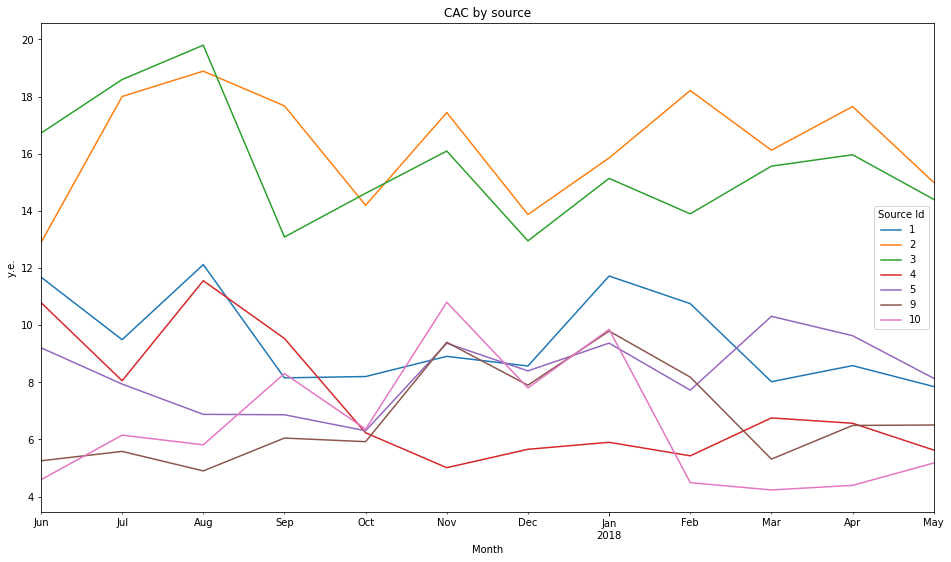

In [98]:
buyers_daily2 = orders_sources.groupby(['Source Id', 'first_order_date']).agg({'Uid': 'count'}).reset_index()
buyers_daily2.rename(columns={'Uid': 'n_buyers'}, inplace=True)
buyers_daily2['first_order_date'] = pd.to_datetime(buyers_daily2['first_order_date'])

costs_cac = pd.merge(buyers_daily2, costs, left_on=['Source Id', 'first_order_date'], right_on=['source_id', 'dt'])
costs_cac['costs_per_buyer'] = costs_cac['costs']/costs_cac['n_buyers']

costs_cac.pivot_table(index=['cost_month'], columns='Source Id', values='costs_per_buyer', aggfunc='mean').plot(
    figsize=(16,9), title='CAC by source', xlabel = 'Month', ylabel = 'у.е.')

plt.show();

In [99]:
new_table = orders_sources.groupby(['Source Id', 'first_order_date']).agg({'Uid': 'count'}).reset_index()
new_table.rename(columns={'Uid': 'n_buyers','Source Id': 'source_id' }, inplace=True)

In [100]:
new_table

source_id first_order_date  n_buyers
0             1       2017-06-01        14
1             1       2017-06-02         7
2             1       2017-06-03         7
3             1       2017-06-04         3
4             1       2017-06-05        18
...         ...              ...       ...
2430         10       2018-05-27         2
2431         10       2018-05-28        10
2432         10       2018-05-29         7
2433         10       2018-05-30         5
2434         10       2018-05-31        35

[2435 rows x 3 columns]

In [101]:
new_table['first_order_date'] = pd.to_datetime(orders['first_order_date'])

In [102]:
new_table

source_id first_order_date  n_buyers
0             1       2017-06-01        14
1             1       2017-06-01         7
2             1       2017-06-01         7
3             1       2017-06-01         3
4             1       2017-06-01        18
...         ...              ...       ...
2430         10       2017-07-02         2
2431         10       2017-07-02        10
2432         10       2017-07-02         7
2433         10       2017-07-02         5
2434         10       2017-07-02        35

[2435 rows x 3 columns]

In [103]:
costs_ = pd.merge(new_table, costs, left_on=['source_id', 'first_order_date'], right_on=['source_id', 'dt'])
costs_['costs_per_buyer'] = costs_['costs']/costs_['n_buyers']



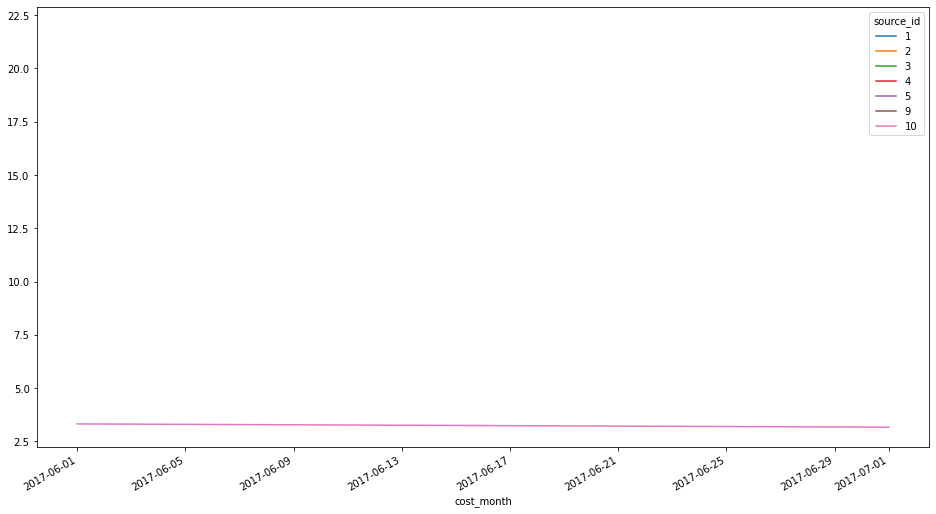

In [104]:
costs_.pivot_table(index=['cost_month'], columns='source_id', values='costs_per_buyer', aggfunc='mean').plot(figsize=(16,9))
plt.show();

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

####  How worthwhile where the investments? (ROI)

In [105]:
CAC_per_month_ROI=CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

first_order_month      month  revenue  cohort_size   age   ltv   CAC
0        2017-06-01 2017-06-01 9557.490         2023 0.000 4.724 8.905
1        2017-06-01 2017-07-01  981.820         2023 1.000 0.485 8.905
2        2017-06-01 2017-08-01  885.340         2023 2.000 0.438 8.905
3        2017-06-01 2017-09-01 1931.300         2023 3.000 0.955 8.905
4        2017-06-01 2017-10-01 2068.580         2023 4.000 1.023 8.905

In [106]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 

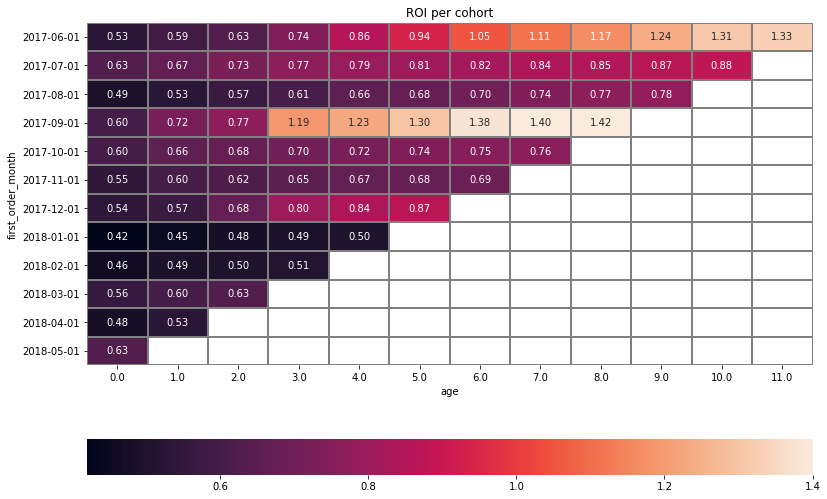

In [107]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(roi_piv,
            annot=True,
            fmt='.2f',
            linewidths=1,
            linecolor='grey', cbar_kws= {'orientation': 'horizontal'},
            vmax=1.4).set(title ='ROI per cohort');

In [108]:
# Let's see if ROI per source will have a different picture
ltv_per_source=orders.groupby(['first_source'])['Uid','Revenue'].agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

source_id  buyers   revenue    ltv
0          1    3365 34797.270 10.341
1          2    3556 45335.950 12.749
2          3   10137 51958.060  5.126
3          4    9999 55387.400  5.539
4          5    7109 54442.140  7.658
5          7       1     1.220  1.220
6          9    1054  5538.500  5.255
7         10    1302  4596.660  3.530

In [109]:
roi_per_source=costs_per_source.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

source_id      costs  buyers   revenue    ltv    cac  romi
0          1  20833.270    3365 34797.270 10.341  6.191 1.670
1          2  42806.040    3556 45335.950 12.749 12.038 1.059
2          3 141321.630   10137 51958.060  5.126 13.941 0.368
3          4  61073.600    9999 55387.400  5.539  6.108 0.907
4          5  51757.100    7109 54442.140  7.658  7.281 1.052
5          9   5517.490    1054  5538.500  5.255  5.235 1.004
6         10   5822.490    1302  4596.660  3.530  4.472 0.789

In [110]:
fig = px.bar(roi_per_source, x='source_id', y='romi')
fig.update_xaxes(type='category')
fig.show();

## Write a conclusion: advise marketing experts how much money to invest and where.

- **the users of desktop are more than twice the number of touch users**
- **according to romi source 3 has the lowest profit and the heighest CAC, so in this case it is better to invest its' costs to the sources with high or highest profit like source 1**

In [111]:
costs.costs[costs.source_id==3].sum()

141321.63

### What sources/platforms would you recommend?

- **both platforms are similar in their distributions, but the desktop has it's advantage beyond the touch one in the users number.**

### Back up your choice: what metrics did you focus on? Why?

- **my focus was on the ROI or ROMI metric,**<br>
<b>Having the foresight to determine if an investment will result in a positive return allows you to make financial decisions that will ultimately help you successfully grow your business

### What conclusions did you draw after finding the metric values?

<b>
1. both platforms are similar in their distributions, but the desktop has it's advantage beyond the touch one in the users number.<br>
2. according to romi source 3 has the lowest profit and the heighest CAC, so in this case it is better to invest its' costs to the sources with high or highest profit like source 1.<br>
3. the high season of the daily usage is between 27/09/2017 - 16/03/2018 and the highest was on the 24/11/2017, that indicates that there was a special event like black friday.<br>
4. the average number of daily users is 1000.<br>
5. the average number of weekly users is 60000.<br>
6. the average number of monthly users is 23228.<br>
7. the highest costs was on month 08/2017.<br>